In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

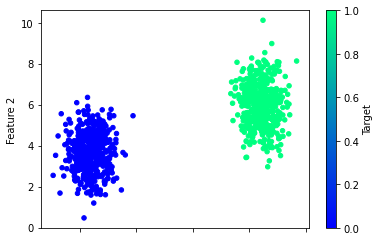

In [2]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [3]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [4]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [11]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [12]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [13]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [14]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [16]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 2s 698us/step - loss: 0.6460 - accuracy: 0.9413
Epoch 2/100
24/24 [==============================] - 0s 696us/step - loss: 0.6372 - accuracy: 0.9427
Epoch 3/100
24/24 [==============================] - 0s 696us/step - loss: 0.6277 - accuracy: 0.9440
Epoch 4/100
24/24 [==============================] - 0s 695us/step - loss: 0.6176 - accuracy: 0.9440
Epoch 5/100
24/24 [==============================] - 0s 609us/step - loss: 0.6069 - accuracy: 0.9467
Epoch 6/100
24/24 [==============================] - 0s 609us/step - loss: 0.5956 - accuracy: 0.9493
Epoch 7/100
24/24 [==============================] - 0s 588us/step - loss: 0.5839 - accuracy: 0.9507
Epoch 8/100
24/24 [==============================] - 0s 565us/step - loss: 0.5717 - accuracy: 0.9520
Epoch 9/100
24/24 [==============================] - 0s 565us/step - loss: 0.5592 - accuracy: 0.9520
Epoch 10/100
24/24 [==============================] - 0s 616us/step - loss: 0.5465 - accura

24/24 [==============================] - 0s 565us/step - loss: 0.1089 - accuracy: 1.0000
Epoch 82/100
24/24 [==============================] - 0s 690us/step - loss: 0.1069 - accuracy: 1.0000
Epoch 83/100
24/24 [==============================] - 0s 565us/step - loss: 0.1050 - accuracy: 1.0000
Epoch 84/100
24/24 [==============================] - 0s 608us/step - loss: 0.1031 - accuracy: 1.0000
Epoch 85/100
24/24 [==============================] - 0s 609us/step - loss: 0.1013 - accuracy: 1.0000
Epoch 86/100
24/24 [==============================] - 0s 609us/step - loss: 0.0995 - accuracy: 1.0000
Epoch 87/100
24/24 [==============================] - 0s 609us/step - loss: 0.0978 - accuracy: 1.0000
Epoch 88/100
24/24 [==============================] - 0s 567us/step - loss: 0.0960 - accuracy: 1.0000
Epoch 89/100
24/24 [==============================] - 0s 522us/step - loss: 0.0944 - accuracy: 1.0000
Epoch 90/100
24/24 [==============================] - 0s 608us/step - loss: 0.0928 - accuracy: 

<AxesSubplot:>

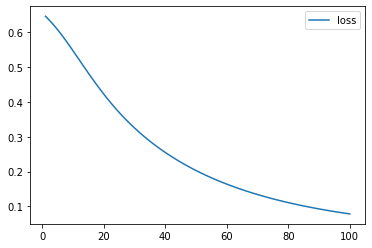

In [17]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

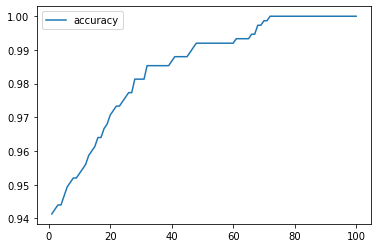

In [18]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [19]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 2s - loss: 0.0726 - accuracy: 1.0000 - 2s/epoch - 239ms/step
Loss: 0.07258989661931992, Accuracy: 1.0


In [20]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

1/1 [==============================] - 0s 91ms/step


array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])